In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def kernels(image):
  kernel1 = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]], dtype=np.float32)

  kernel2 = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]], dtype=np.float32)
  
  # Aplicar kernel1 a la imagen original
  filtered1 = cv2.filter2D(
      image,
      ddepth=cv2.CV_32F,
      kernel=kernel1
  )
  
  # Aplicar kernel2 a la imagen original
  filtered2 = cv2.filter2D(
      image,
      ddepth=cv2.CV_32F,
      kernel=kernel2
  )
  
  # Sumar las imágenes filtradas
  filtered = np.sqrt(np.pow(filtered1, 2) + np.pow(filtered2, 2))
  
  # Normalización para visualizar
  filtered_norm = cv2.normalize(
      filtered, None, 0, 255, cv2.NORM_MINMAX
  ).astype(np.uint8)

  return filtered_norm

In [2]:
import os

os.chdir('dataset')

pen = []
coin = []

# Definir tamaño fijo, por ejemplo 256x256
fixed_size = (256, 256)

for target in ['coin', 'pen']:
  for file in os.listdir(target):
    image = cv2.imread(os.path.join(target, file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if target == 'coin':
      coin.append(gray)
    else:
      pen.append(gray)


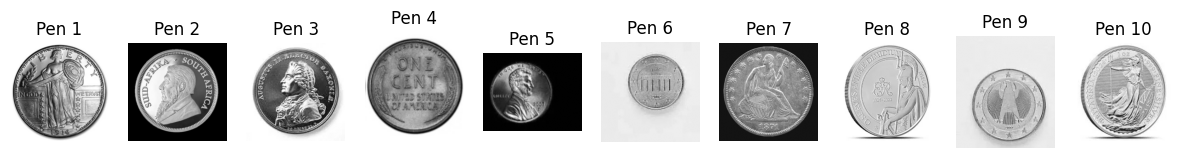

In [3]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(coin), figsize=(15, 5))
for i, img in enumerate(coin):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

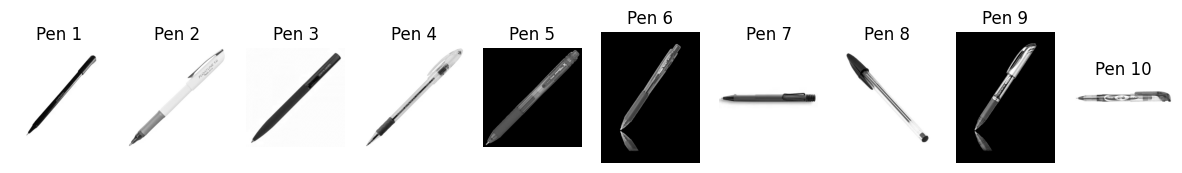

In [4]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(pen), figsize=(15, 5))
for i, img in enumerate(pen):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

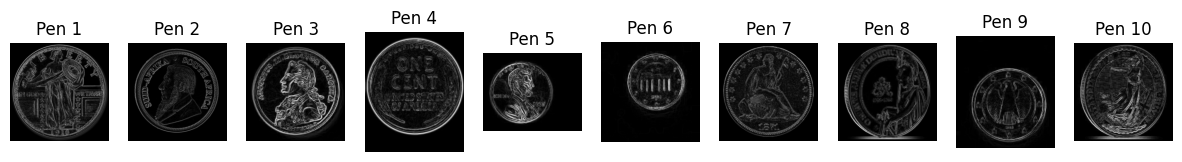

In [5]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(coin), figsize=(15, 5))
for i, img in enumerate(coin):
    filtered_norm = kernels(img)
    axes[i].imshow(filtered_norm, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

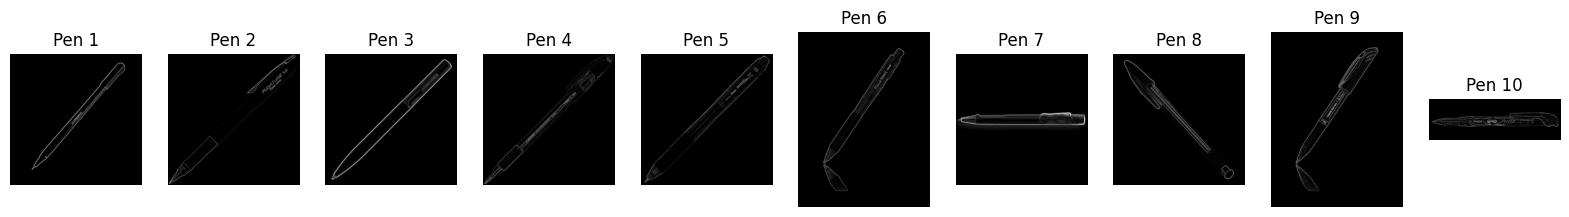

In [6]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(pen), figsize=(20, 10))
for i, img in enumerate(pen):
    filtered_norm = kernels(img)
    axes[i].imshow(filtered_norm, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

In [7]:
def evaluar_clasificador(lista_imagenes, etiqueta_real):
    aciertos = 0
    total = len(lista_imagenes)
    predicciones = []

    for img in lista_imagenes:
        bordes_8u = kernels(img)
        
        contornos, _ = cv2.findContours(bordes_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contornos:
            cnt = max(contornos, key=cv2.contourArea)
            area = cv2.contourArea(cnt)
            perimetro = cv2.arcLength(cnt, True)
            
            if perimetro > 0:
                circularidad = (4 * np.pi * area) / (perimetro ** 2)
                pred = 1 if circularidad > 0.3 else 0
                predicciones.append(pred)
                
                if pred == etiqueta_real:
                    aciertos += 1
        else:
            predicciones.append(-1)

    return aciertos, total


aciertos_pen, total_pen = evaluar_clasificador(pen, 0)
aciertos_coin, total_coin = evaluar_clasificador(coin, 1)

total_general = total_pen + total_coin
total_aciertos = aciertos_pen + aciertos_coin
accuracy = (total_aciertos / total_general) * 100

print("-" * 30)
print(f"RESULTADOS DEL CLASIFICADOR")
print("-" * 30)
print(f"Plumas:  {aciertos_pen}/{total_pen} correctas")
print(f"Monedas: {aciertos_coin}/{total_coin} correctas")
print("-" * 30)
print(f"ACCURACY TOTAL: {accuracy:.2f}%")
print("-" * 30)

------------------------------
RESULTADOS DEL CLASIFICADOR
------------------------------
Plumas:  10/10 correctas
Monedas: 8/10 correctas
------------------------------
ACCURACY TOTAL: 90.00%
------------------------------
